In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
df_master=pd.read_csv('master_subsector_2018_eurostat_based.csv')
df_master['UTC']=pd.to_datetime(df_master['UTC'])
df_master=df_master.set_index('UTC')
df_master=df_master[[col for col in df_master if any(x in col for x in ['total', 'off', 'on','usolar'])]]
df_master.head()

AT_total   BE_total   BG_total   CZ_total    DE_total  \
UTC                                                                           
2018-01-01 00:00:00  30.907469  36.313481  10.400939  25.566075  207.377555   
2018-01-01 01:00:00  30.303309  36.349154  10.302227  25.010636  203.273983   
2018-01-01 02:00:00  30.230933  36.615313  10.251960  24.856255  202.762926   
2018-01-01 03:00:00  31.586080  36.834050  10.387979  24.824960  203.086188   
2018-01-01 04:00:00  32.051912  37.147452  10.753465  23.648323  207.157800   

                      DK_total  EE_total   ES_total   FI_total    FR_total  \
UTC                                                                          
2018-01-01 00:00:00  13.906968  3.620307  81.854783  31.926282  144.456166   
2018-01-01 01:00:00  13.646207  3.632257  81.714458  32.017459  151.752907   
2018-01-01 02:00:00  13.538320  3.478149  81.976657  32.155874  152.133556   
2018-01-01 03:00:00  13.540221  3.557765  82.551277  32.435982  152.316397   
2018-01-01 04:00:00  13.774787  3.669802  84.717832  32.798338  156.382365   

                     ...  RO_usolar  ES_usolar  PT_usolar  NO_usolar  \
UTC                  ...                                               
2018-01-01 00:00:00  ...        0.0        0.0        0.0        0.0   
2018-01-01 01:00:00  ...        0.0        0.0        0.0        0.0   
2018-01-01 02:00:00  ...        0.0        0.0        0.0        0.0   
2018-01-01 03:00:00  ...        0.0        0.0        0.0        0.0   
2018-01-01 04:00:00  ...        0.0        0.0        0.0        0.0   

                     SE_usolar  FI_usolar  DK_usolar  IE_usolar  LU_usolar  \
UTC                                                                          
2018-01-01 00:00:00        0.0        0.0        0.0        0.0        0.0   
2018-01-01 01:00:00        0.0        0.0        0.0        0.0        0.0   
2018-01-01 02:00:00        0.0        0.0        0.0        0.0        0.0   
2018-01-01 03:00:00        0.0        0.0        0.0        0.0        0.0   
2018-01-01 04:00:00        0.0        0.0        0.0        0.0        0.0   

                     MA_usolar  
UTC                             
2018-01-01 00:00:00        0.0  
2018-01-01 01:00:00        0.0  
2018-01-01 02:00:00        0.0  
2018-01-01 03:00:00        0.0  
2018-01-01 04:00:00        0.0  

[5 rows x 91 columns]

In [3]:
demand_countries=[col[:2] for col in df_master.columns if 'total' in col]
off_countries = list(set([col[:2] for col in df_master.columns if 'off' in col]).intersection(set(demand_countries)))
on_countries = list(set([col[:2] for col in df_master.columns if 'on' in col]).intersection(set(demand_countries)))
solar_countries=list(set([col[:2] for col in df_master.columns if 'usolar' in col]).intersection(set(demand_countries)))
print('demand ', len(demand_countries), demand_countries)
print('offshore ', len(off_countries), off_countries)
print('onshore ',len(on_countries), on_countries)
print('solar ',len(solar_countries), solar_countries)

demand  26 ['AT', 'BE', 'BG', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK']
offshore  9 ['IT', 'GR', 'NL', 'DE', 'ES', 'FR', 'UK', 'LT', 'DK']
onshore  26 ['EE', 'IT', 'BE', 'HR', 'RO', 'DE', 'LU', 'FR', 'UK', 'LT', 'HU', 'IE', 'SE', 'DK', 'BG', 'FI', 'LV', 'SK', 'GR', 'CZ', 'ES', 'PT', 'AT', 'NL', 'SI', 'PL']
solar  26 ['EE', 'IT', 'BE', 'HR', 'RO', 'DE', 'LU', 'FR', 'UK', 'LT', 'HU', 'IE', 'SE', 'DK', 'BG', 'FI', 'LV', 'SK', 'GR', 'CZ', 'ES', 'PT', 'AT', 'NL', 'SI', 'PL']


In [4]:
annual=pd.read_excel('eurostat_annual_18.xlsx', sheet_name='Sheet 1', skiprows=9, usecols=[0,1,3,5,7], index_col=0)
annual.index.name='country'
annual_demand=pd.DataFrame(columns=['country', 'TWh'])
for country in demand_countries:
    _annual_demand=annual.loc[country].sum()*11.63/1000
    annual_demand=annual_demand.append({'country':country, 'TWh':_annual_demand}, ignore_index=True)
annual_demand=annual_demand.set_index('country')
annual_demand

TWh
country             
AT        289.611423
BE        371.321477
BG        109.006827
CZ        270.227702
DE       2263.612028
DK        151.322582
EE         31.733618
ES        873.960773
FI        277.389456
FR       1530.912724
GR        160.078809
HR         73.842359
HU        197.302950
IE        125.761005
IT       1261.879423
LT         43.753223
LU         42.863528
LV         60.846997
NL        472.015180
PL        758.512089
PT        178.831021
RO        260.394537
SE        339.569251
SI         55.992635
SK        111.206060
UK       1353.314483

In [5]:
df=pd.DataFrame(index=df_master.index)
df.index.name='UTC'
df['EU_demand']=df_master[[col for col in df_master.columns if 'total' in col]].sum(axis=1) # in GW
GWh_2018=df['EU_demand'].sum()
df['nuclear']=np.full((8760,1), GWh_2018*0.15/8760 )

off_base=annual_demand.loc[off_countries, 'TWh'].sum()
df['offshore_CF']=0
for country in off_countries:
    df['offshore_CF']=df['offshore_CF']+df_master['%s_off' %country]/100*annual_demand.loc[country, 'TWh']/off_base

df['onshore_CF']=0
df['solar_CF']=0
for country in on_countries:
    df['onshore_CF']=df['onshore_CF']+df_master['%s_on' %country]/100*annual_demand.loc[country, 'TWh']*1000/GWh_2018
    df['solar_CF']=df['solar_CF']+df_master['%s_usolar' %country]/100*annual_demand.loc[country, 'TWh']*1000/GWh_2018

IC_offshore=GWh_2018/8760*0.85/3/df['offshore_CF'].mean() # offshore wind installed capacity in GW
IC_onshore=GWh_2018/8760*0.85/3/df['onshore_CF'].mean() # onshore wind installed capacity in GW
IC_solar=GWh_2018/8760*0.85/3/df['solar_CF'].mean() # onshore wind installed capacity in GW


df['offshore']=df['offshore_CF']*IC_offshore
df['onshore']=df['onshore_CF']*IC_onshore
df['solar']=df['solar_CF']*IC_solar
    
    
df.describe()

EU_demand       nuclear  offshore_CF   onshore_CF     solar_CF  \
count  8760.000000  8.760000e+03  8760.000000  8760.000000  8760.000000   
mean   1331.650932  1.997476e+02     0.399863     0.362706     0.203929   
std     399.254971  5.684666e-14     0.179676     0.140623     0.249004   
min     433.541746  1.997476e+02     0.037394     0.074668     0.000000   
25%    1067.356853  1.997476e+02     0.260658     0.257549     0.000000   
50%    1342.500462  1.997476e+02     0.380575     0.346048     0.048864   
75%    1602.726970  1.997476e+02     0.520107     0.451747     0.420266   
max    2775.065402  1.997476e+02     0.929582     0.847565     0.812906   

          offshore      onshore        solar  
count  8760.000000  8760.000000  8760.000000  
mean    377.301097   377.301097   377.301097  
std     169.538125   146.281480   460.697145  
min      35.283879    77.673073     0.000000  
25%     245.951011   267.912569     0.000000  
50%     359.101997   359.972949    90.406982  
75%     490.761038   469.925439   777.559668  
max     877.131947   881.671132  1504.005623

In [14]:
print('solar installed capacity = ' , IC_solar , 'GW')
print('offshore installed capacity = ', IC_offshore, 'GW')
print('onshore installed capacity = ', IC_onshore, 'GW')

solar installed capacity =  1850.1596889099628 GW
offshore installed capacity =  943.5766806425966 GW
onshore installed capacity =  1040.2395566214755 GW


In [17]:
df['nuclear'].mean()+df['offshore'].mean()+df['onshore'].mean()+df['solar'].mean()

1331.6509315068515

In [18]:
df.to_csv('2018_EU_hourly_generation_demand.csv')
df.head()

EU_demand    nuclear  offshore_CF  onshore_CF  \
UTC                                                                    
2018-01-01 00:00:00  1144.947181  199.74764     0.708406    0.759499   
2018-01-01 01:00:00  1132.042655  199.74764     0.747232    0.752009   
2018-01-01 02:00:00  1129.987387  199.74764     0.780887    0.753773   
2018-01-01 03:00:00  1132.673800  199.74764     0.773395    0.750711   
2018-01-01 04:00:00  1142.915227  199.74764     0.767901    0.743725   

                     solar_CF    offshore     onshore  solar  
UTC                                                           
2018-01-01 00:00:00       0.0  668.435470  790.060699    0.0  
2018-01-01 01:00:00       0.0  705.071029  782.269316    0.0  
2018-01-01 02:00:00       0.0  736.827124  784.104426    0.0  
2018-01-01 03:00:00       0.0  729.757327  780.919662    0.0  
2018-01-01 04:00:00       0.0  724.573068  773.652314    0.0

In [19]:
df.describe()

EU_demand       nuclear  offshore_CF   onshore_CF     solar_CF  \
count  8760.000000  8.760000e+03  8760.000000  8760.000000  8760.000000   
mean   1331.650932  1.997476e+02     0.399863     0.362706     0.203929   
std     399.254971  5.684666e-14     0.179676     0.140623     0.249004   
min     433.541746  1.997476e+02     0.037394     0.074668     0.000000   
25%    1067.356853  1.997476e+02     0.260658     0.257549     0.000000   
50%    1342.500462  1.997476e+02     0.380575     0.346048     0.048864   
75%    1602.726970  1.997476e+02     0.520107     0.451747     0.420266   
max    2775.065402  1.997476e+02     0.929582     0.847565     0.812906   

          offshore      onshore        solar  
count  8760.000000  8760.000000  8760.000000  
mean    377.301097   377.301097   377.301097  
std     169.538125   146.281480   460.697145  
min      35.283879    77.673073     0.000000  
25%     245.951011   267.912569     0.000000  
50%     359.101997   359.972949    90.406982  
75%     490.761038   469.925439   777.559668  
max     877.131947   881.671132  1504.005623

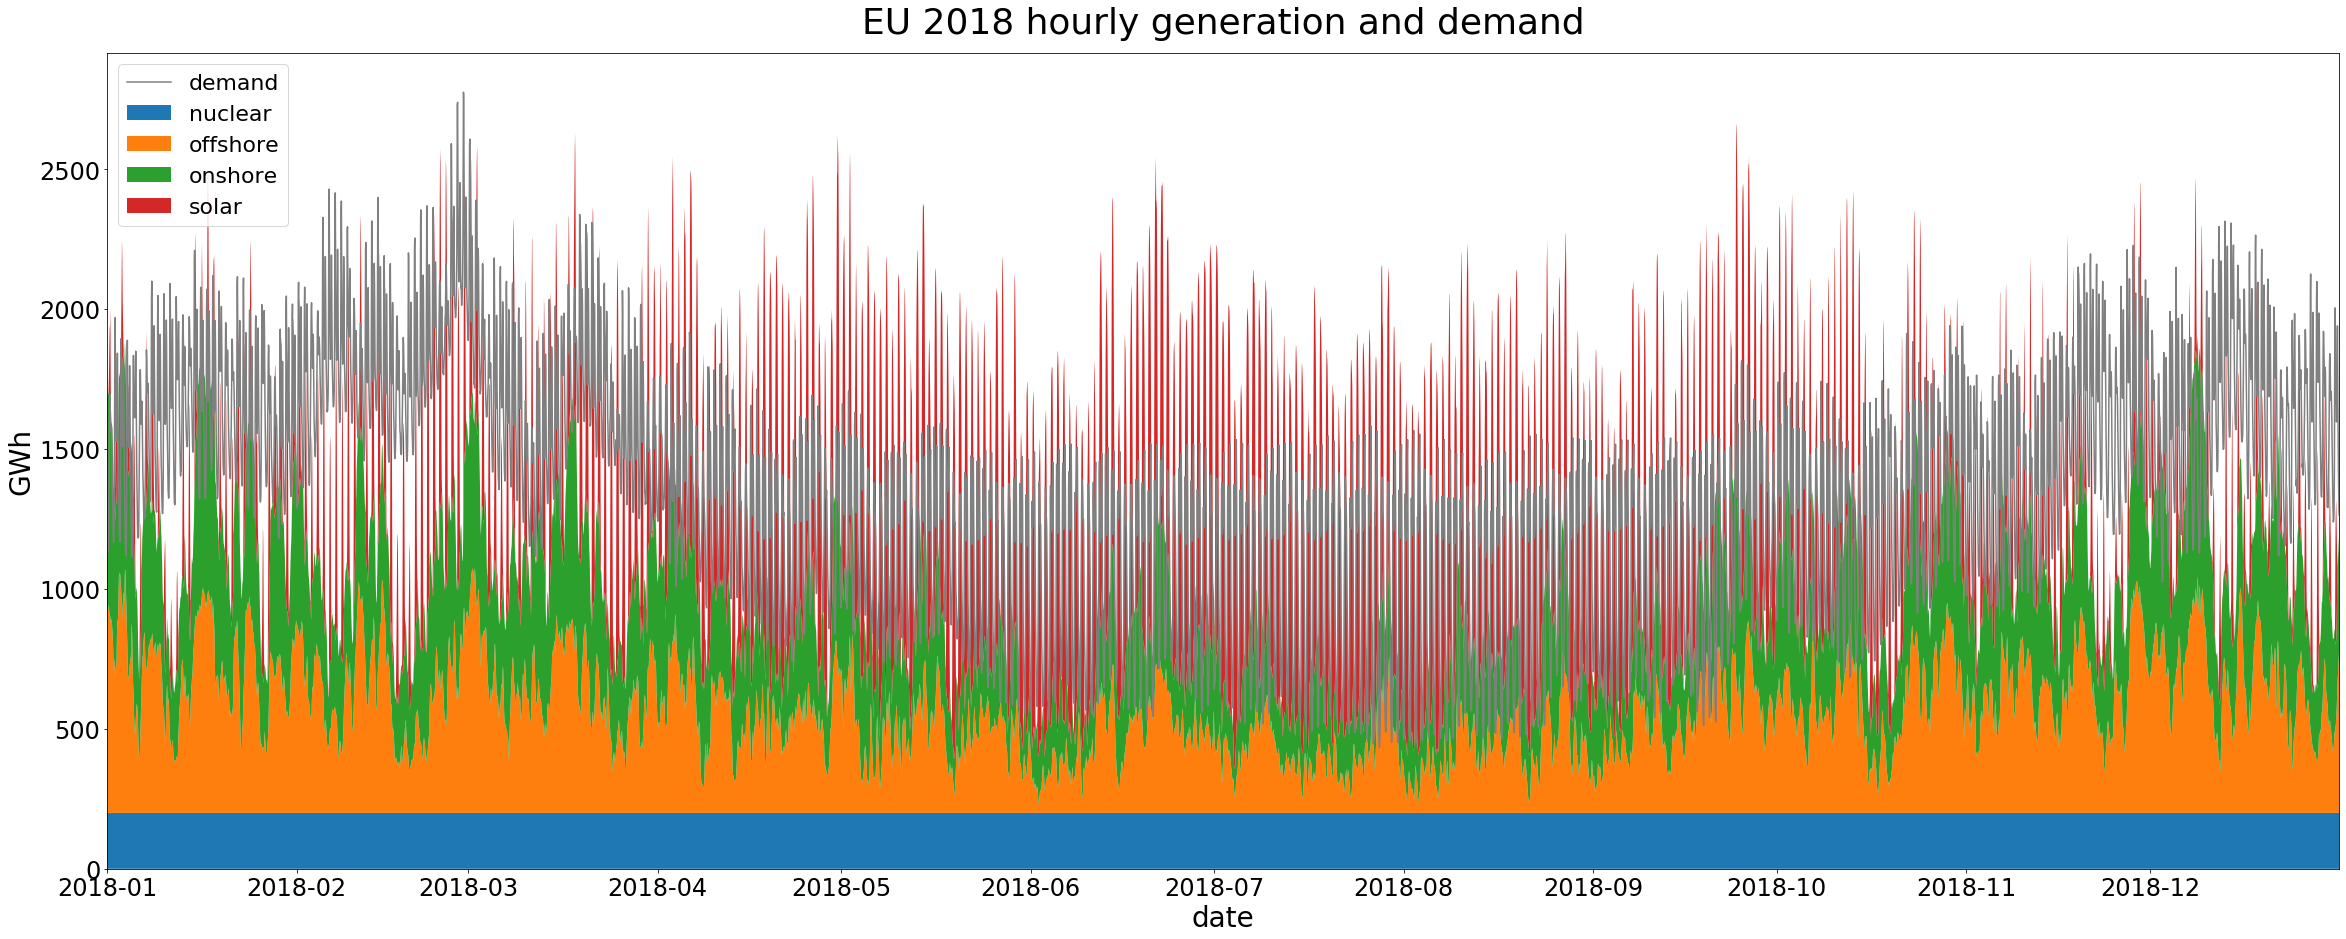

In [28]:
plt.figure(figsize=(40,15))

plt.plot(df['EU_demand'], color='grey', label='demand')
plt.stackplot(df.index , df[['nuclear', 'offshore', 'onshore', 'solar']].values.T, labels=['nuclear', 'offshore', 'onshore', 'solar'])


plt.xlabel('date', size=28)
plt.ylabel('GWh', size=28)
plt.title('EU 2018 hourly generation and demand', size=36, pad=20)
plt.xlim(df.index[0], df.index[-1])
plt.xticks(size=24)
plt.yticks(size=24)
plt.legend(prop={'size': 22})

plt.savefig('generation_demand.png')
plt.show()

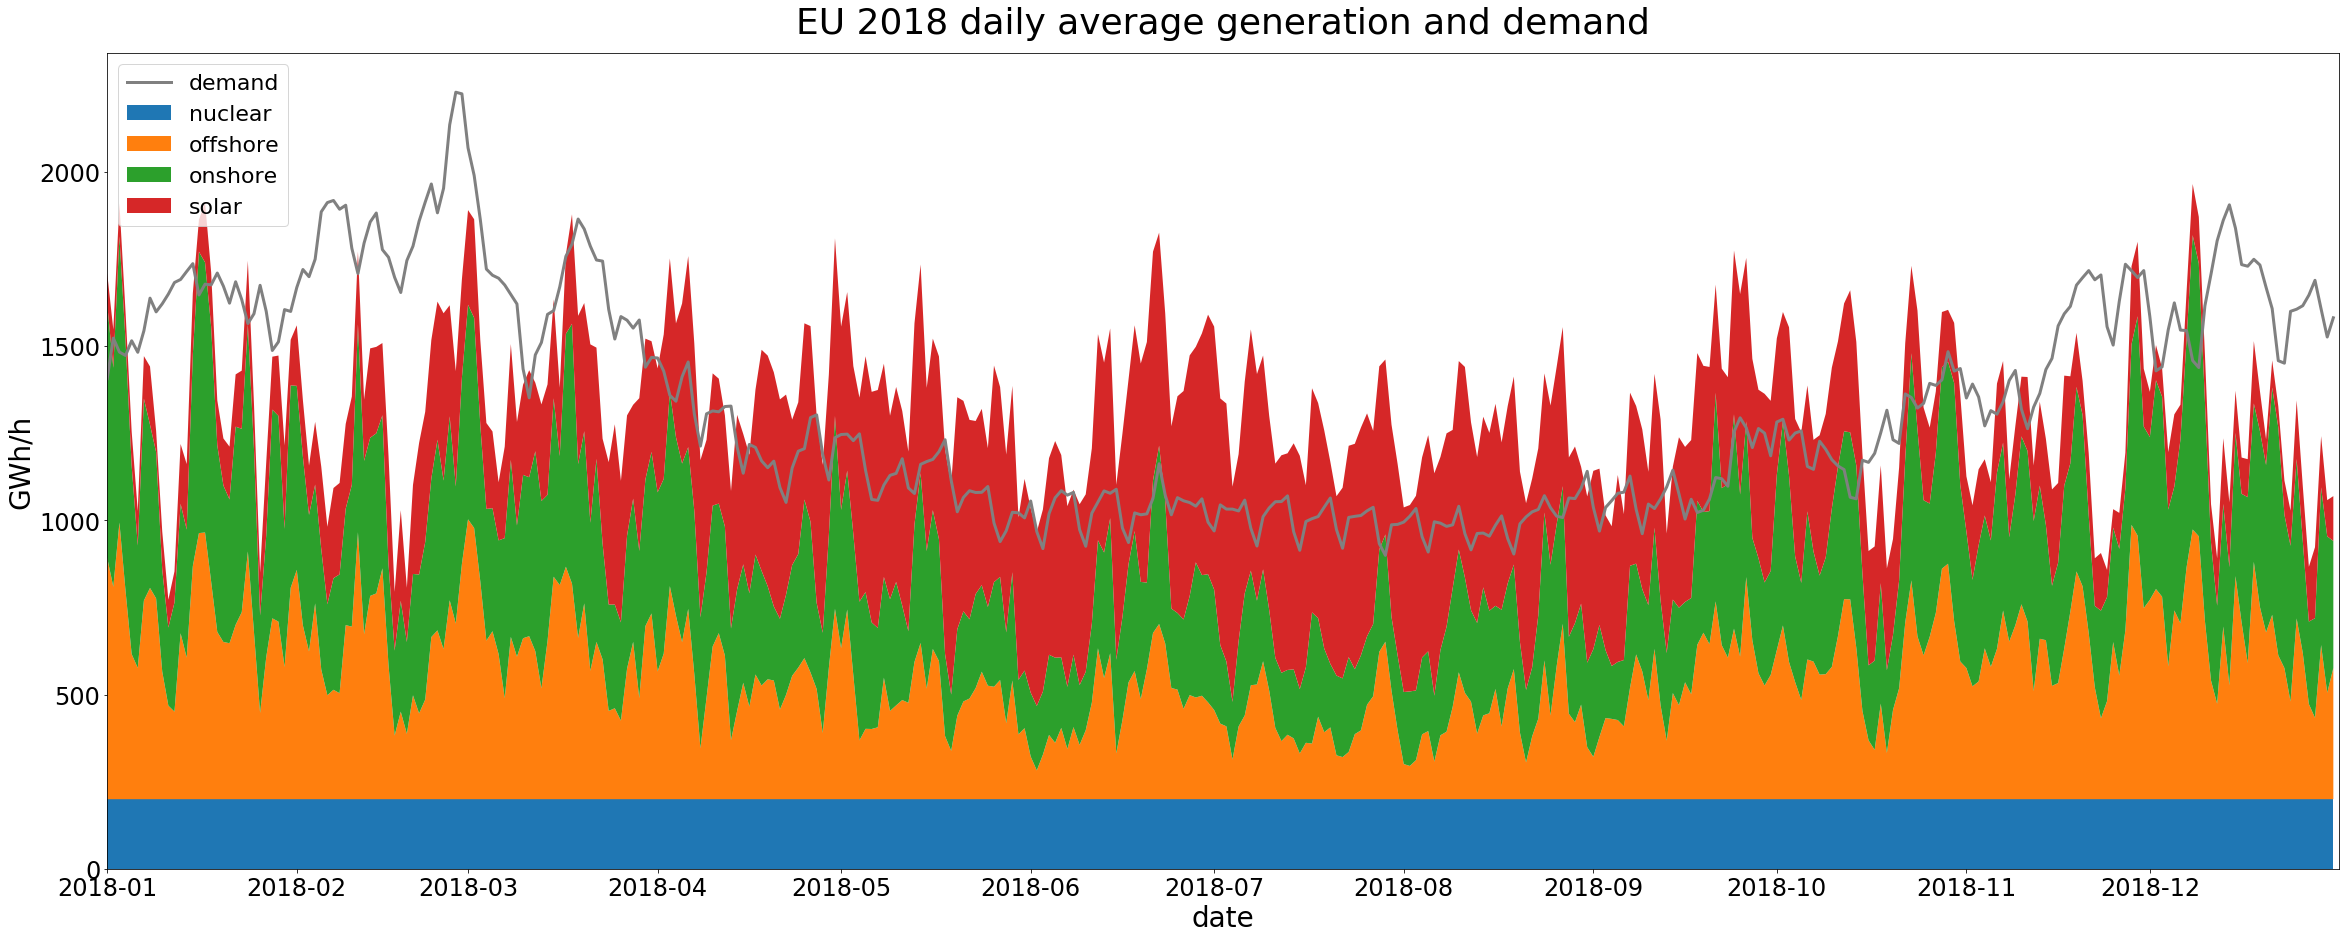

In [27]:
plt.figure(figsize=(40,15))

plt.stackplot(pd.date_range(start='2018-01-01', end='2018-12-31', freq='1D') , (df[['nuclear', 'offshore', 'onshore', 'solar']].groupby(df.index.date).mean()).values.T, labels=['nuclear', 'offshore', 'onshore', 'solar'])
plt.plot(df['EU_demand'].groupby(df.index.date).mean(), color='grey', label='demand', linewidth=3)


plt.xlabel('date', size=28)
plt.ylabel('GWh/h', size=28)
plt.title('EU 2018 daily average generation and demand', size=36, pad=20)
plt.xlim(df.index[0], df.index[-1])
plt.xticks(size=24)
plt.yticks(size=24)
plt.legend(prop={'size': 22})

plt.savefig('generation_demand_daily_average.png')
plt.show()

In [24]:
df['residual_demand']=df['EU_demand']-df['nuclear']-df['offshore']-df['onshore']-df['solar']

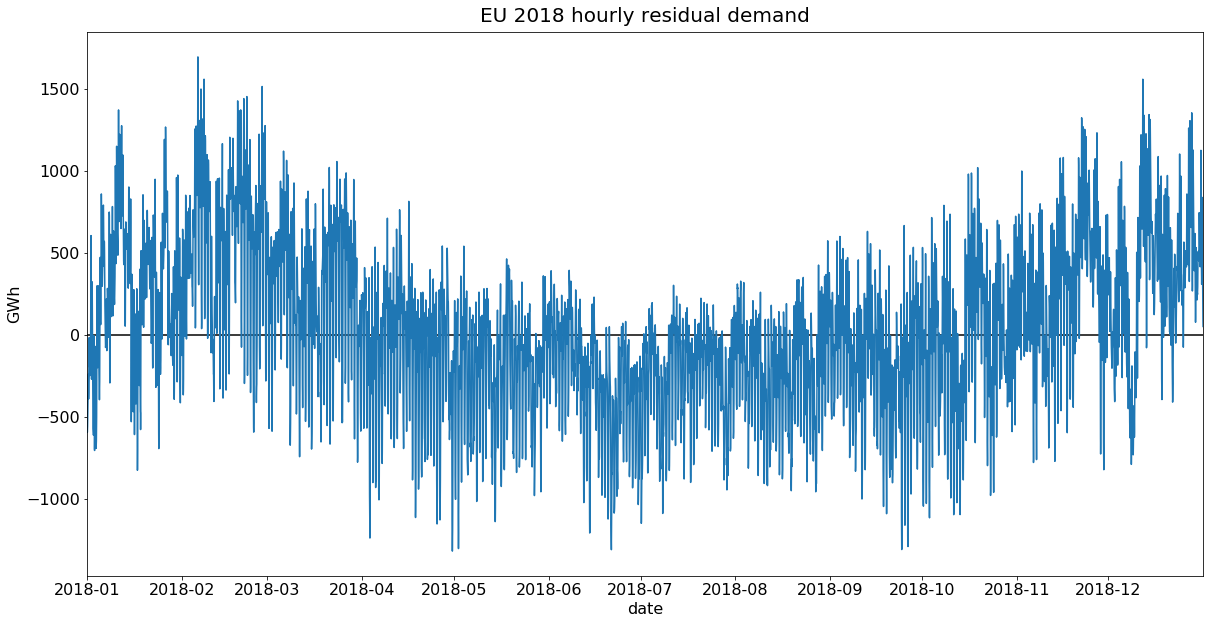

In [25]:
plt.figure(figsize=(20,10))

plt.plot(df['residual_demand'])
plt.hlines(y=0, xmax=df.index[-1], xmin=df.index[0])
plt.xlim(df.index[0], df.index[-1])
plt.xlabel('date', size=16)
plt.ylabel('GWh' , size=16)
plt.xticks(size=16)
plt.yticks(size=16)

plt.title('EU 2018 hourly residual demand', size=20, pad=10)


plt.savefig('residual_demand.png')
plt.show()

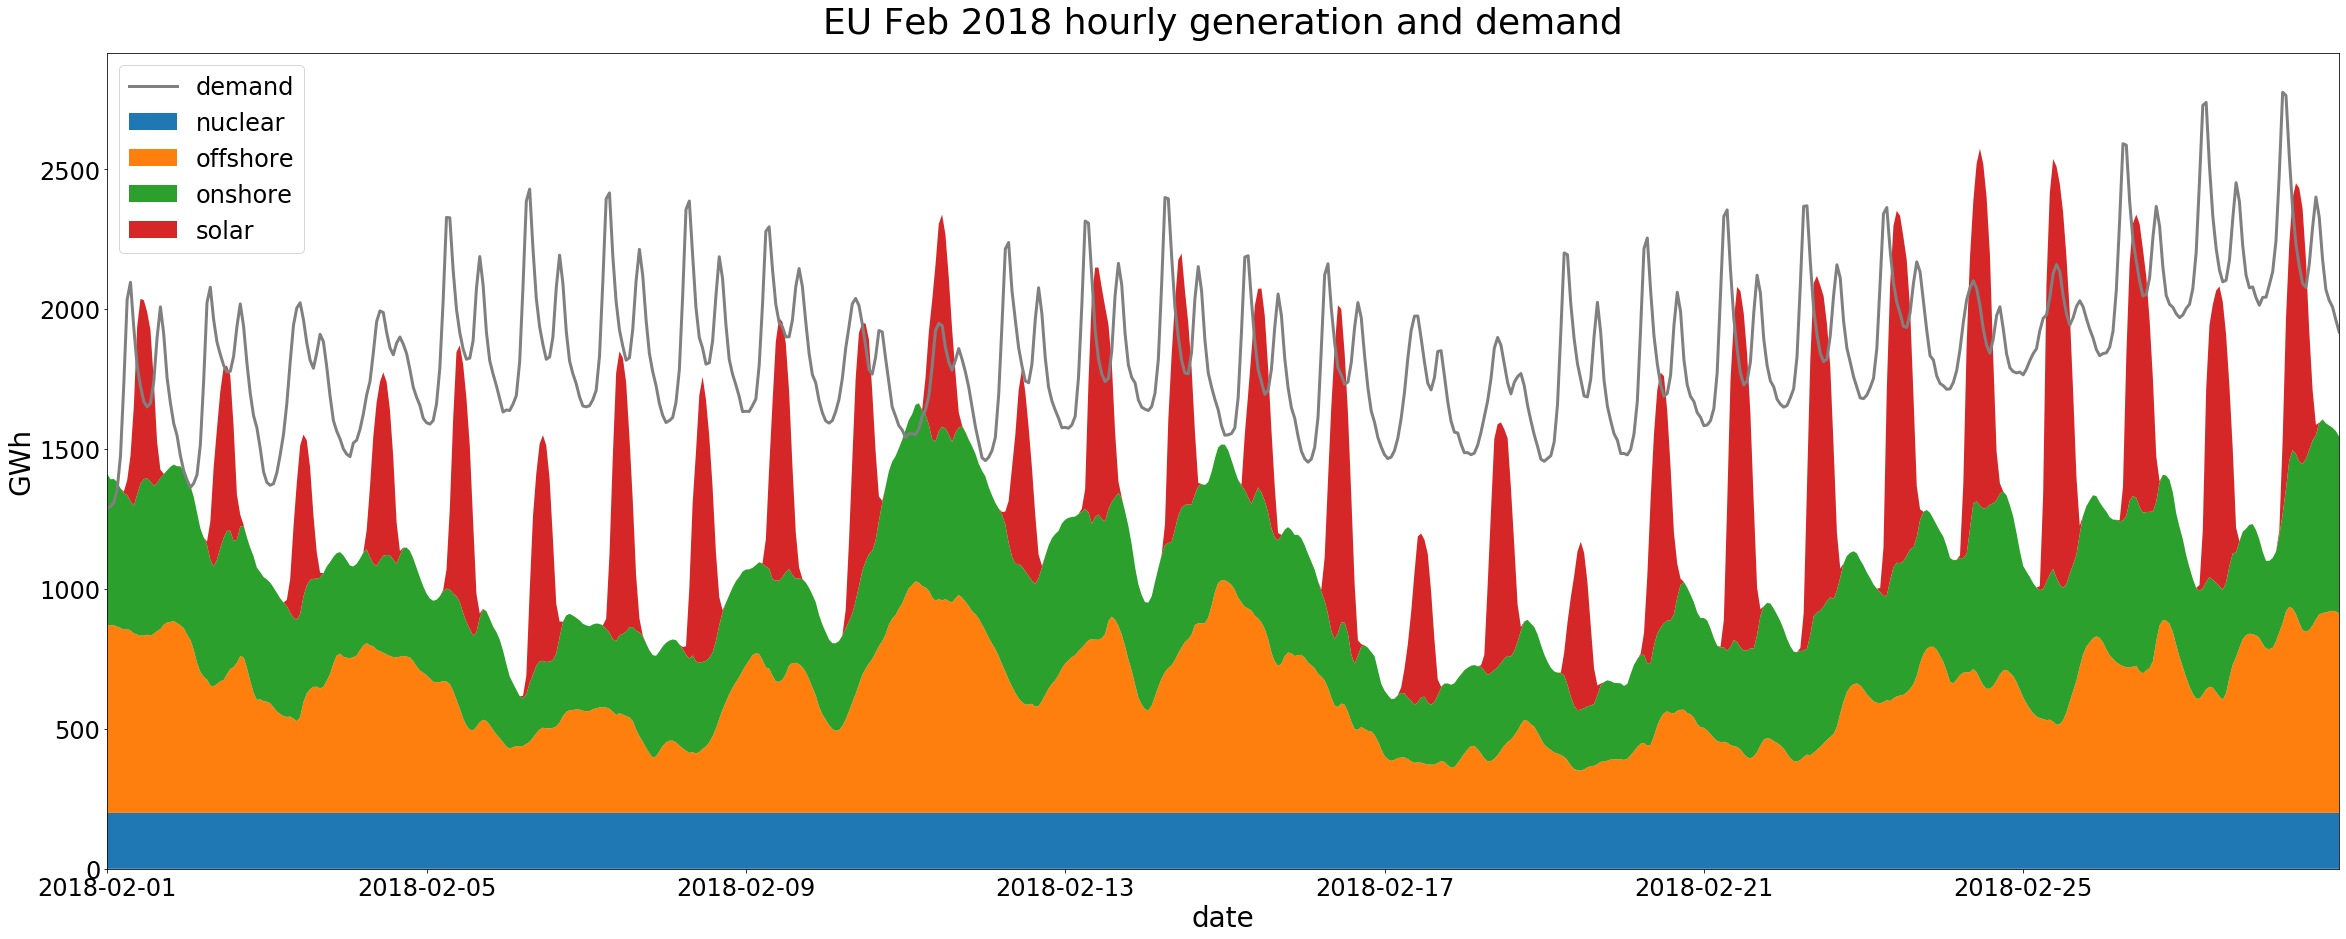

In [30]:
plt.figure(figsize=(40,15))

plt.stackplot([idx for idx in df.index if idx.month==2] , df.loc[df.index.month==2, ['nuclear', 'offshore', 'onshore', 'solar']].values.T, labels=['nuclear', 'offshore', 'onshore', 'solar'])
plt.plot(df.loc[df.index.month==2, 'EU_demand'], color='grey', label='demand', linewidth=3)


plt.xlabel('date', size=28)
plt.ylabel('GWh', size=28)
plt.title('EU Feb 2018 hourly generation and demand', size=36, pad=20)

plt.xticks(size=24)
plt.yticks(size=24)
plt.legend(prop={'size': 24})

plt.xlim(pd.to_datetime('2018-02-01 00:00:00'), pd.to_datetime('2018-02-28 23:00:00'))


plt.savefig('generation_demand_winter.png')
plt.show()

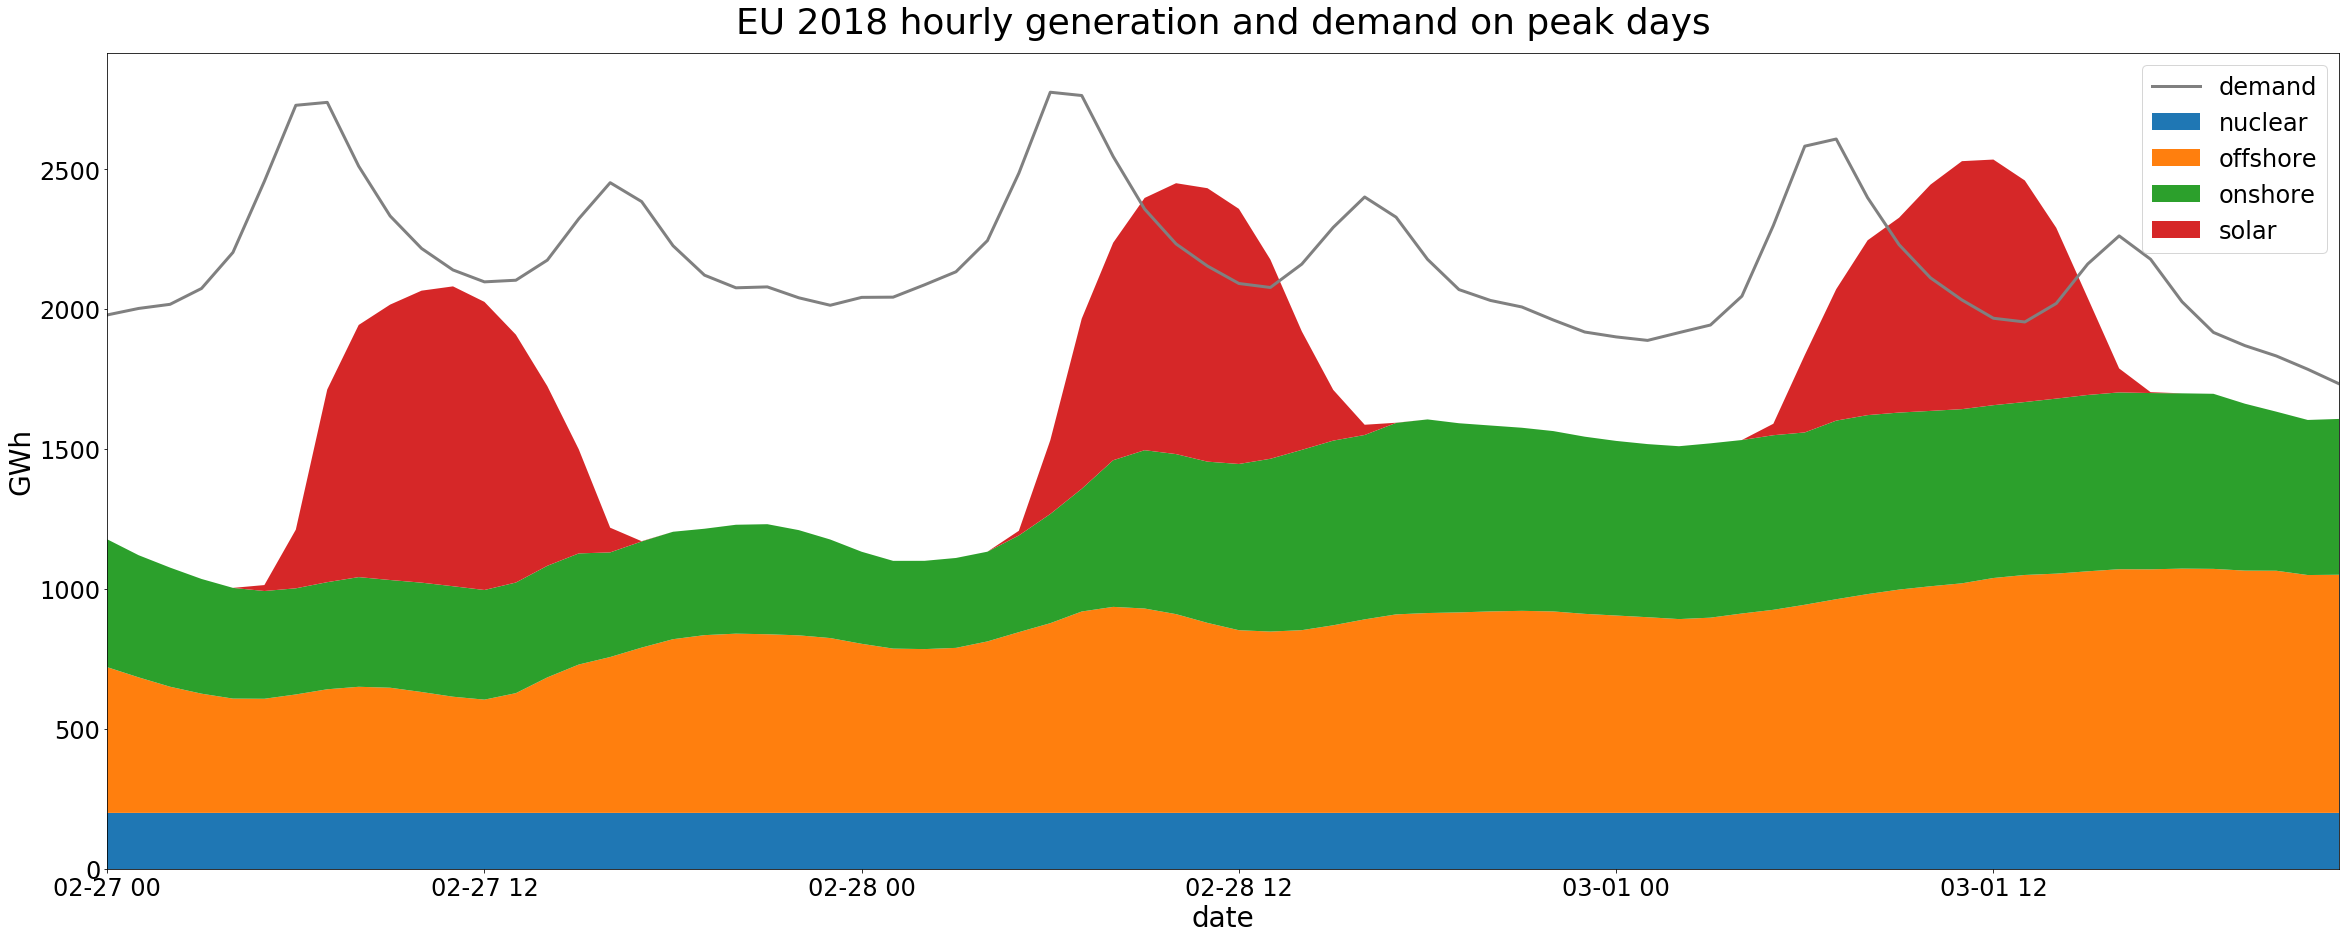

In [32]:
plt.figure(figsize=(40,15))

plt.stackplot(pd.date_range(start='2018-02-27 00:00:00' , end='2018-03-01 23:00:00', freq='60min'), df.loc[(df.index>=pd.to_datetime('2018-02-27 00:00:00')) & (df.index<=pd.to_datetime('2018-03-01 23:00:00')), ['nuclear', 'offshore', 'onshore', 'solar']].values.T, labels=['nuclear', 'offshore', 'onshore', 'solar'])
plt.plot(df.loc[(df.index>=pd.to_datetime('2018-02-27 00:00:00')) & (df.index<=pd.to_datetime('2018-03-01 23:00:00')) , 'EU_demand'], color='grey', label='demand', linewidth=3)


plt.xlabel('date', size=28)
plt.ylabel('GWh', size=28)
plt.title('EU 2018 hourly generation and demand on peak days', size=36, pad=20)

plt.xticks(size=24)
plt.yticks(size=24)
plt.legend(prop={'size': 24})

plt.xlim(pd.to_datetime('2018-02-27 00:00:00'), pd.to_datetime('2018-03-01 23:00:00'))


plt.savefig('generation_demand_peak.png')
plt.show()

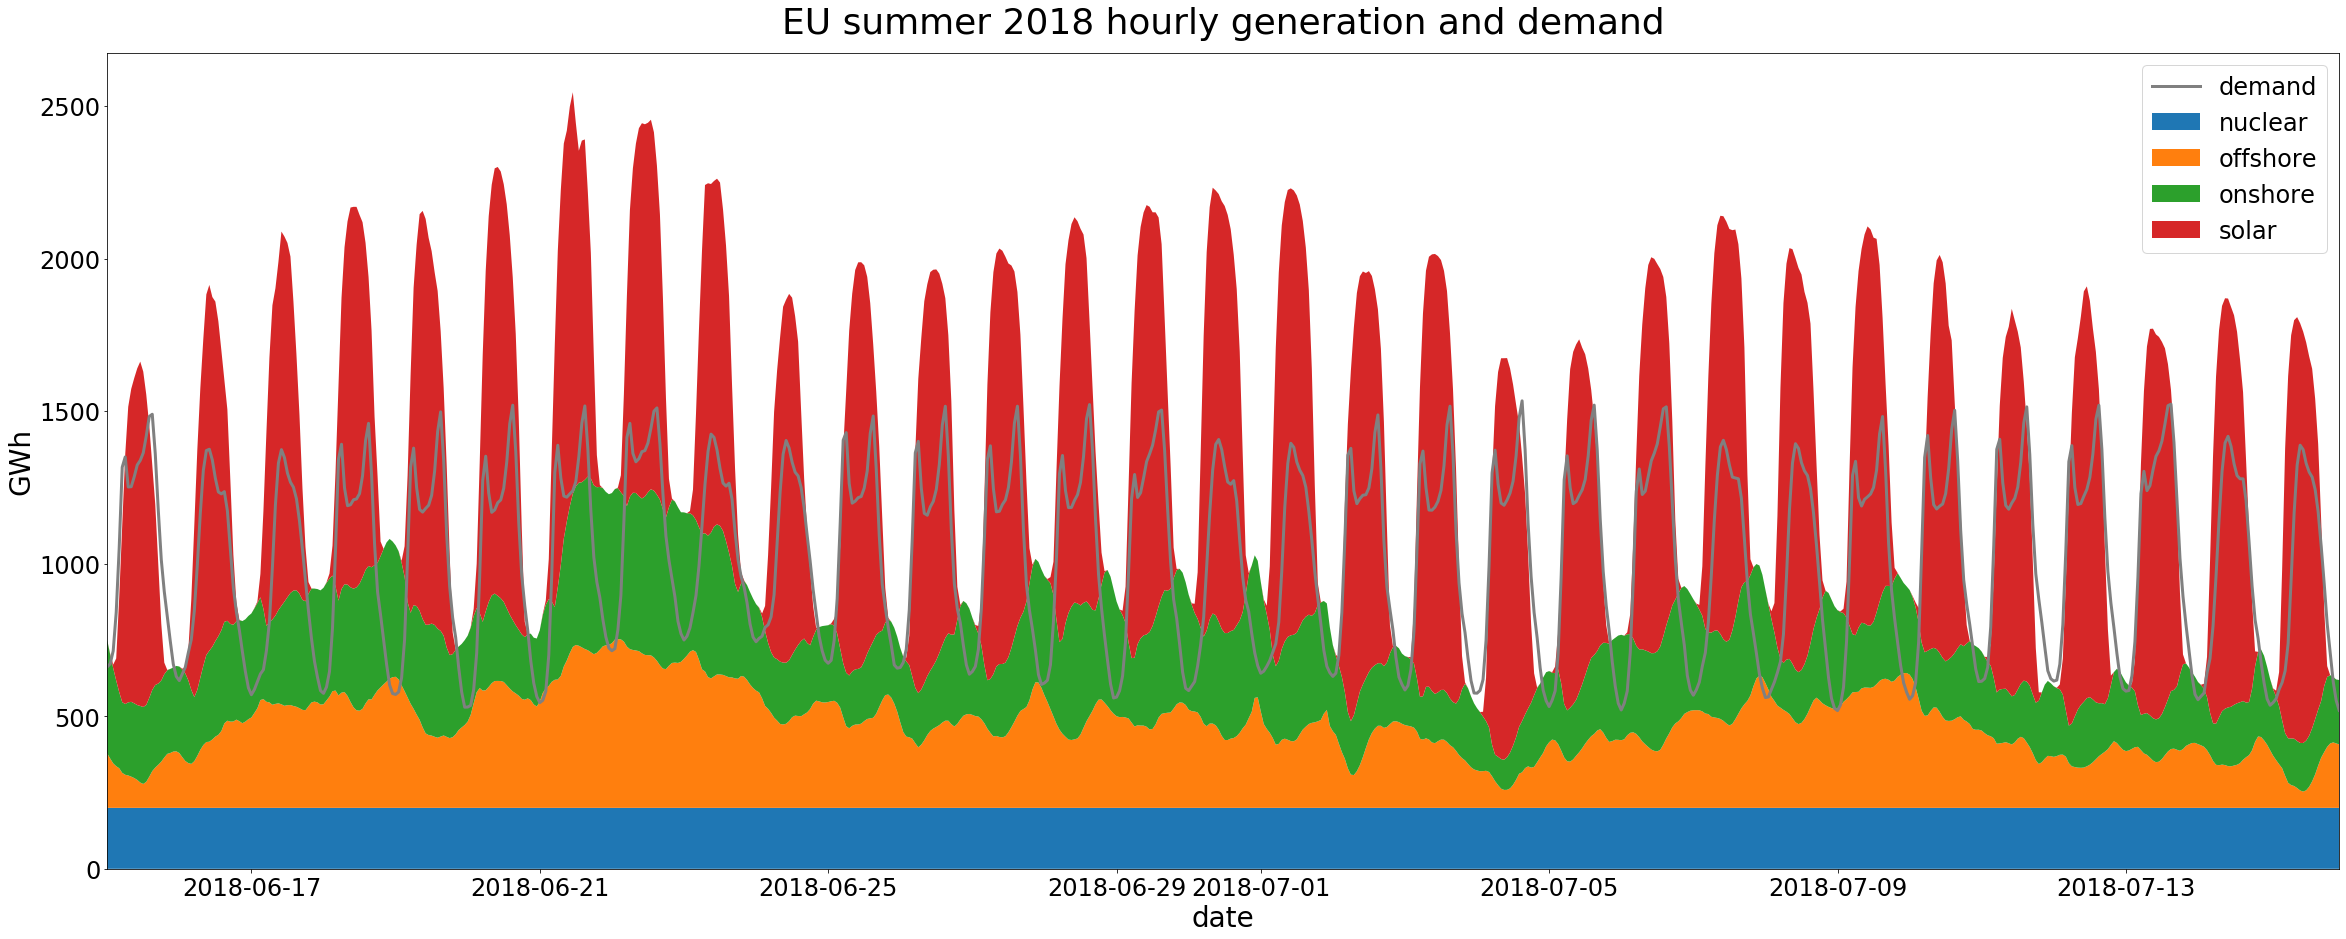

In [34]:
plt.figure(figsize=(40,15))

plt.stackplot(pd.date_range(start='2018-06-15 00:00:00' , end='2018-07-15 23:00:00', freq='60min'), df.loc[(df.index>=pd.to_datetime('2018-06-15 00:00:00')) & (df.index<=pd.to_datetime('2018-07-15 23:00:00')), ['nuclear', 'offshore', 'onshore', 'solar']].values.T, labels=['nuclear', 'offshore', 'onshore', 'solar'])
plt.plot(df.loc[(df.index>=pd.to_datetime('2018-06-15 00:00:00')) & (df.index<=pd.to_datetime('2018-07-15 23:00:00')) , 'EU_demand'], color='grey', label='demand', linewidth=3)


plt.xlabel('date', size=28)
plt.ylabel('GWh', size=28)
plt.title('EU summer 2018 hourly generation and demand', size=36, pad=20)

plt.xticks(size=24)
plt.yticks(size=24)
plt.legend(prop={'size': 24})

plt.xlim(pd.to_datetime('2018-06-15 00:00:00'), pd.to_datetime('2018-07-15 23:00:00'))


plt.savefig('generation_demand_summer.png')
plt.show()